In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import openmc

In [5]:
results_filename = 'statepoint.10.h5'
results = openmc.StatePoint(results_filename)

#extracts the tally values from the simulation results
cell_tally = results.get_tally(name='detector_surface_tally')
df = cell_tally.get_pandas_dataframe()
df

,energy low [eV],energy high [eV],particle,surface,nuclide,score,mean,std. dev.
0,69270.0,89470.0,neutron,48,total,current,0.003774,0.000058
1,89470.0,109600.0,neutron,48,total,current,0.004333,0.000062
2,109600.0,129700.0,neutron,48,total,current,0.004653,0.000070
3,129700.0,149700.0,neutron,48,total,current,0.005199,0.000086
4,149700.0,169800.0,neutron,48,total,current,0.004945,0.000076
5,169800.0,189800.0,neutron,48,total,current,0.005687,0.000078
6,189800.0,209600.0,neutron,48,total,current,0.005525,0.000078
7,209600.0,243400.0,neutron,48,total,current,0.010197,0.000126
8,243400.0,293500.0,neutron,48,total,current,0.015664,0.000132
9,293500.0,343900.0,neutron,48,total,current,0.016891,0.000138


In [7]:
def read_results_file(res_path):
    #import real measurement data

    with open(res_path) as myfile:
        data = myfile.readlines()

    data = data[5:]
    erg = []
    meas_value = []
    meas_uncert = []

    for line in data:
        line = line.strip()
        line =  " ".join(line.split())
        line = line.split()
        erg.append(float(line[0]))
        meas_value.append(float(line[1]))
        meas_uncert.append(float(line[4]))
    
    return erg, meas_value, meas_uncert
path = "bi_cf252_results.txt"
erg, meas_value, meas_uncert = read_results_file(path)
energy = np.array(erg)

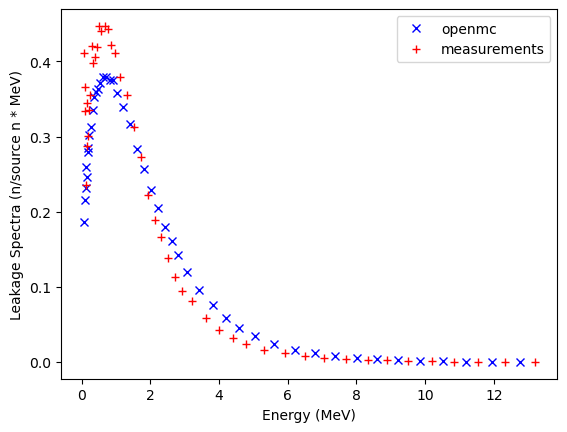

In [10]:
curr = cell_tally.mean.ravel()
curr_unc = cell_tally.std_dev.ravel()

#find energy bin width in units of MeV
bin_widths = (df['energy high [eV]'] - df['energy low [eV]']) /10**6
energy_midpoints = (df['energy high [eV]'] + df['energy low [eV]']) / 2

#divide
n_per_mev = curr / bin_widths
norm_openmc_current = neutrons_per_mev
meas_curr = np.array(meas_value) 

plt.step(energy_midpoints/10**6, (norm_openmc_current), label='openmc',color='b', marker='x', ls='none')
plt.step(energy, meas_curr, label='measurements',color='r',marker='+',ls='none')
plt.legend()
plt.xlabel("Energy (MeV)")
plt.ylabel("Leakage Spectra (n/source n * MeV)")

plt.show()

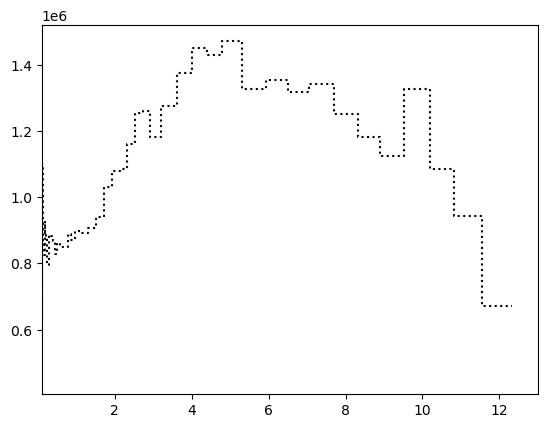

In [9]:
#plot a graph of the ratio C/E
openmc_spectra = norm_openmc_current*10**6
results_spectra = meas_curr


ratio = openmc_spectra / results_spectra[:-1]
plt.step(erg[:-1], ratio, ls='dotted', color='black')
plt.xlim(0.1,13)
plt.show()